In [2]:
!pip install os-sys

  Using cached os_sys-2.1.4-py3-none-any.whl (15.6 MB)
  Using cached Django-3.1.7-py3-none-any.whl (7.8 MB)
  Using cached auto_py_to_exe-2.8.0-py2.py3-none-any.whl (79 kB)
  Using cached spacy-2.2.0.tar.gz (5.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\kamen\anaconda3\python.exe' 'C:\Users\kamen\anaconda3\lib\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\kamen\AppData\Local\Temp\pip-build-env-bwm0c7zd\normal' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- 'cython>=0.25' 'cymem<2.1.0,>=2.0.2' wheel 'thinc<7.2.0,>=7.1.1' 'murmurhash<1.1.0,>=0.28.0' 'preshed<3.1.0,>=3.0.2'
       cwd: None
  Complete output (216 lines):
    Using cached Cython-0.29.22-cp38-cp38-win_amd64.whl (1.7 MB)
    Using cached cymem-2.0.5-cp38-cp38-win_amd64.whl (36 kB)
    Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
    Using cached thinc-7.1.1.tar.gz (1.9 MB)
    Using cached murmurhash-1.0.5-cp38-cp38-win_amd64.whl (21 kB)
    Using cached preshed-3.0.5-cp38-cp38-win_amd64.whl (112 kB)
    Using cached blis-0.4.1-cp38-cp38-win_amd64.whl (5.0 MB)
    Using cached wasabi-0.8.2-py3-none-any.whl (23 kB)
   

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from wfdb.io import get_record_list
from wfdb import rdsamp
from tensorflow.keras import layers
from scipy.signal import resample_poly

print('библиотеки загружены')

библиотеки загружены


In [5]:
# Training dataset.
df = pd.read_csv("train.csv", header=None)
x_train = df.values[:, :-3]
y_train = df.values[:, -3].astype(int)
print(np.shape(x_train)[0])
print(y_train)
#max_len = x_train.shape[] 
#print(max_len)
x_train = x_train.reshape(np.shape(x_train)[0],1,-1) 
y_train = y_train.reshape(np.shape(y_train)[0],1,-1) 

# Validation dataset.
df = pd.read_csv("validate.csv", header=None)
x_validate = df.values[:, :-3]
y_validate = df.values[:, -3].astype(int)
x_validate = x_validate.reshape(np.shape(x_validate)[0],1,-1) 
y_validate = y_validate.reshape(np.shape(y_validate)[0],1,-1) 
print(x_validate)
print(np.shape(y_validate))

# Test dataset.
df = pd.read_csv("test.csv", header=None)
x_test = df.values[:, :-3]
y_test = df.values[:, -3].astype(int)
x_test = x_test.reshape(np.shape(y_test)[0],1,-1) 
y_test = y_test.reshape(np.shape(y_test)[0],1,-1)

print('базы данных загружены и разделены')

106684
[1 0 0 ... 0 0 0]
[[[0.705586 0.865366 0.532801 ... 0.       0.       0.      ]]

 [[0.676751 0.789063 0.181331 ... 0.       0.       0.      ]]

 [[0.676241 0.714362 0.553126 ... 0.       0.       0.      ]]

 ...

 [[0.857404 0.735331 0.056984 ... 0.       0.       0.      ]]

 [[0.947858 0.7606   0.294646 ... 0.       0.       0.      ]]

 [[0.650051 0.684381 0.565188 ... 0.       0.       0.      ]]]
(21337, 1, 1)
базы данных загружены и разделены


In [14]:
%pwd

'C:\\Users\\kamen\\OneDrive\\Рабочий стол\\code\\ECG_ML-master'

In [2]:
#early_stopping = tf.keras.callbacks.EarlyStopping(
#    monitor='val_auc', 
#    verbose=1,
 #   patience=10,
 #   mode='max',
 #   restore_best_weights=True)
#C:\Users\User\Desktop\all\ECG.py.koen\ECG_ML-master
callbacks = [tf.keras.callbacks.EarlyStopping( monitor='accuracy', 
                                verbose=1,
                                patience=50,
                                mode='max',
                    restore_best_weights=True),
           tf.keras.callbacks.ModelCheckpoint('C:\\Users\\kamen\\OneDrive\\Рабочий стол\\code\\ECG_ML-master\\lstm_model_testing.hdf5', 
                            monitor='val_auc',             
                            verbose=1, save_best_only=True,
                            save_weights_only=False,         
                            mode='auto')]
#saveBestModel = keras.callbacks.ModelCheckpoint('/best_model.hdf5', monitor='val_acc', 
#                                                verbose=0, save_best_only=True, save_weights_only=False,
#                                                mode='auto', period=1)

In [65]:
from tensorflow import keras

n_batch, n_timesteps, n_input_dim = 256, 1, 187
#training_gen = data.ecg_generator(mitdb_signals, mitdb_beats, mitdb_labels, ma, bw, win_size=n_timesteps, batch_size=n_batch)

# Create sequential model and add layers to it
model = tf.keras.Sequential()

model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True), input_shape=(n_timesteps, n_input_dim)))
#model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=inp))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
METRICS = [
          keras.metrics.TruePositives(name='tp'),
          keras.metrics.FalsePositives(name='fp'),
          keras.metrics.TrueNegatives(name='tn'),
          keras.metrics.FalseNegatives(name='fn'), 
          keras.metrics.BinaryAccuracy(name='accuracy'),
          keras.metrics.Precision(name='precision'),
          keras.metrics.Recall(name='recall'),
          keras.metrics.AUC(name='auc'),
    ]


#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-4),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=METRICS)
    
#initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')  
#model.save_weights(initial_weights)
print('построение модели')

построение модели


In [10]:
# Training dataset.
df =pd.read_csv("train_testing.csv", header=None)
#rint(df.shape)
x_train = df.values[:, : 650000]
print('x',x_train)
print('x',x_train.shape)
y_train = df.values[:,650000: -160].astype(int)
x_train = x_train.reshape(np.shape(x_train)[0],1,-1) 
y_train = y_train.reshape(np.shape(y_train)[0],1,-1)
print('y',np.shape(y_train))


print('val')
# Validation dataset.
df = pd.read_csv("validate_testing.csv", header=None)
x_validate = df.values[:,: 650000]
y_validate = df.values[:,650000: -160].astype(int)
x_validate = x_validate.reshape(np.shape(x_validate)[0],1,-1) 
y_validate = y_validate.reshape(np.shape(y_validate)[0],1,-1)
print('x',x_validate[1])
print('y',y_validate.shape)

# Test dataset.
df = pd.read_csv("test_testing.csv", header=None)
print(df.shape)
x_test = df.values[:, :650000]
y_test = df.values[:,650000:  -160].astype(int)
x_test = x_test.reshape(np.shape(x_test)[0],1,-1) 
y_test = y_test.reshape(np.shape(y_test)[0],1,-1)

print('test')
print('x',x_test[1])
print('y',y_test.shape)

x [[-0.16  -0.16  -0.16  ... -0.335 -0.32   0.   ]
 [-0.375 -0.375 -0.375 ... -0.235 -0.245  0.   ]
 [ 0.22   0.22   0.22  ... -0.285 -0.28   0.   ]
 ...
 [-0.47  -0.47  -0.47  ... -1.825 -1.74  -1.28 ]
 [-0.095 -0.095 -0.095 ... -0.32  -0.285  0.   ]
 [ 0.21   0.21   0.21  ...  0.015  0.035  0.   ]]
x (17, 650000)
y (17, 1, 650000)
val
x [[-0.095 -0.095 -0.095 ... -0.11  -0.115  0.   ]]
y (6, 1, 650000)
(6, 1300160)
test
x [[0.065 0.065 0.065 ... 0.33  0.325 0.   ]]
y (6, 1, 650000)


In [11]:
from tensorflow import keras

n_batch, n_timesteps, n_input_dim = 1, 1, 1
#training_gen = data.ecg_generator(mitdb_signals, mitdb_beats, mitdb_labels, ma, bw, win_size=n_timesteps, batch_size=n_batch)

# Create sequential model and add layers to it
model = tf.keras.Sequential()

model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True), input_shape=(n_timesteps, n_input_dim)))
#model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=inp))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
METRICS = [
          keras.metrics.TruePositives(name='tp'),
          keras.metrics.FalsePositives(name='fp'),
          keras.metrics.TrueNegatives(name='tn'),
          keras.metrics.FalseNegatives(name='fn'), 
          keras.metrics.BinaryAccuracy(name='accuracy'),
          keras.metrics.Precision(name='precision'),
          keras.metrics.Recall(name='recall'),
          keras.metrics.AUC(name='auc'),
    ]


#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=METRICS)
    
#initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')  
#model.save_weights(initial_weights)
print('построение модели')

построение модели


In [13]:
hist = model.fit(x_train,
          y_train,
          batch_size=n_batch,
          steps_per_epoch=1000,
          epochs=400,
          callbacks=callbacks ,         
          validation_data=(x_validate, y_validate))
print('модель обучена')

Epoch 1/400


ValueError: in user code:

    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\layers\wrappers.py:539 __call__
        return super(Bidirectional, self).__call__(inputs, **kwargs)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\layers\wrappers.py:652 call
        y = self.forward_layer(forward_inputs,
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:660 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\kamen\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer forward_lstm_4: expected shape=(None, None, 1), found shape=(1, 1, 650000)


In [3]:
history = model.fit(x_train,
          y_train,
          batch_size=n_batch,
          steps_per_epoch=1000,
          epochs=400,
          callbacks=callbacks ,         
          validation_data=(x_validate, y_validate))
print('модель обучена')


NameError: name 'model' is not defined

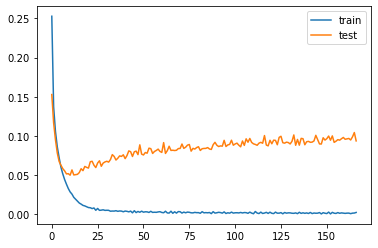

In [68]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [67]:
score = model.evaluate(x_test, y_test, batch_size=128)
print('Specificity :  {0:f}%\n'.format(( score[3]/(score[3]+score[2]))*100))
print('Sensitivity :  {0:f}%\n'.format(score[7]*100))
print('Accuracy    : {0:f}%\n'.format(score[5]*100))
#print('test loss, tn, tp, fn, fp, prec, sen, test acc:', results[0])

167/167 [==============================] - 1s 6ms/step - loss: 0.0894 - tp: 5116.0000 - fp: 148.0000 - tn: 15906.0000 - fn: 167.0000 - accuracy: 0.9852 - precision: 0.9719 - recall: 0.9684 - auc: 0.9902
Specificity :  99.078111%

Sensitivity :  96.838915%

Accuracy    : 98.523688%



In [73]:

from tensorflow.keras.models import load_model
loaded_model=load_model('lstm_model.hdf5')
x_test_all = []
for i in range(21337):
    x_test_all = np.append(x_test_all, x_test[i])
   

In [76]:
print(x_test_all.shape) 

(3990019,)


In [83]:
y_pred = (loaded_model.predict(x_test) >= 0.15)
print(y_pred)
print(y_test)

[[[False]]

 [[ True]]

 [[False]]

 ...

 [[ True]]

 [[ True]]

 [[ True]]]
[[[0]]

 [[1]]

 [[0]]

 ...

 [[1]]

 [[0]]

 [[0]]]


In [ ]:
## SAVE MODEL ##
# serialize model to JSON
model_json = model.to_json()
with open("lstm_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("lstm_model.h5")
print("Saved model to disk")

In [89]:
from sklearn.metrics import confusion_matrix
y_pred = (loaded_model.predict(x_test) >= 0.15).astype(int)
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred.astype(int)).ravel() 
#predictions = model.predict(x_test[:3])

#while y_predicted
print(type(y_pred))
print(type(y_test))

conf_mat = confusion_matrix(y_test, y_pred)
#sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
#specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


ValueError: unknown is not supported

In [43]:
# Summary of the model
model.summary()        

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_17 (Bidirectio (None, 1, 128)            129024    
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 1, 128)            98816     
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 227,969
Trainable params: 227,969
Non-trainable params: 0
_________________________________________________________________


In [35]:
def rnn_model(max_len):
    opt = Adadelta()
    model = Sequential()

    model.add(Bidirectional(LSTM(32,
                             return_sequences = True),
                             input_shape=(max_len, 1)))
    model.add(Bidirectional(LSTM(32,return_sequences = False)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(2,activation='softmax'))

    model.summary()
    model.compile(optimizer=opt, 
                    loss='categorical_crossentropy',
                    metrics = ['accuracy'])

    return model